# 데이터 처리
## investing.com
### JOIN 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.read_excel('palm_nino_concat.xlsx')

In [ ]:
data_df.head()

### 데이터 선택
2008년 이전 데이터는 불연속적이므로 2008년 이후만 사용한다.

In [ ]:
df = data_df.query('YEAR > 2007')

In [ ]:
df

### 인덱스, 열 처리

In [ ]:
df.set_index('DATE', inplace = True)

In [ ]:
df.drop(columns = ['YEAR', 'MONTH', 'year', 'month'], inplace = True)

In [ ]:
df.head()

## KIS

### KIS 팜유-nino3.4 JOIN 데이터 만들기

In [3]:
palm_df = pd.read_excel('PALMOIL_FUTURE-KIS.xlsx')
nino34_df = pd.read_excel('nino34.xlsx', sheet_name = 'Nino3.4')

In [4]:
nino34_df = pd.melt(nino34_df, id_vars=['year'], value_vars=list(nino34_df.columns.values)[1:], var_name='month', value_name='nino34')

In [5]:
nino34_df.head()

,year,month,nino34
0,1950,1,24.55
1,1951,1,25.24
2,1952,1,26.67
3,1953,1,26.74
4,1954,1,26.98


In [6]:
nino34_df['DATE'] = pd.to_datetime(nino34_df[['year', 'month']].assign(DAY=1))
nino34_df.sort_values(by='DATE', inplace=True)

In [7]:
nino34_df.head()

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
72,1950,2,25.06,1950-02-01
144,1950,3,25.87,1950-03-01
216,1950,4,26.28,1950-04-01
288,1950,5,26.18,1950-05-01


In [8]:
palm_df.rename(columns = {'기간(월)': 'DATE'}, inplace = True)

In [9]:
palm_df.head()

,DATE,평균가,전년동월평균가,전년도동월대비,등락률(%),종가,환산가($/ton)
0,2022-01-01,4857.00,3522.47,"▲ 1,334.53",37.89,4857.0,1165.88
1,2021-12-01,4632.82,3438.73,"▲ 1,194.09",34.72,4697.0,1109.26
2,2021-11-01,4903.86,3257.95,"▲ 1,645.91",50.52,4672.0,1156.97
3,2021-10-01,4911.41,2910.81,"▲ 2,000.60",68.73,4929.0,1182.21
4,2021-09-01,4379.61,2859.14,"▲ 1,520.47",53.18,4595.0,1046.57


In [10]:
print(len(nino34_df))
print(len(palm_df))

864
135


In [11]:
df = palm_df.merge(nino34_df, how = 'inner', on = 'DATE')

In [12]:
len(df)

134

In [14]:
df.sort_values(by = 'DATE', inplace = True)
df

,DATE,평균가,전년동월평균가,전년도동월대비,등락률(%),종가,환산가($/ton),year,month,nino34
133,2010-11-01,3257.68,0.00,"▲ 3,257.68",0.00,3412.0,NaN,2010,11,25.06
132,2010-12-01,3626.81,0.00,"▲ 3,626.81",0.00,3788.0,NaN,2010,12,25.00
131,2011-01-01,3741.47,0.00,"▲ 3,741.47",0.00,3809.0,NaN,2011,1,25.00
130,2011-02-01,3750.43,0.00,"▲ 3,750.43",0.00,3515.0,NaN,2011,2,25.64
129,2011-03-01,3424.65,0.00,"▲ 3,424.65",0.00,3326.0,NaN,2011,3,26.36
...,...,...,...,...,...,...,...,...,...,...
4,2021-08-01,4307.95,2701.63,"▲ 1,606.32",59.46,4254.0,1028.16,2021,8,26.32
3,2021-09-01,4379.61,2859.14,"▲ 1,520.47",53.18,4595.0,1046.57,2021,9,26.16
2,2021-10-01,4911.41,2910.81,"▲ 2,000.60",68.73,4929.0,1182.21,2021,10,25.77
1,2021-11-01,4903.86,3257.95,"▲ 1,645.91",50.52,4672.0,1156.97,2021,11,25.76


### 인덱스, 열 처리

In [15]:
df.set_index('DATE', inplace = True)
df.drop(columns = ['전년동월평균가', '전년도동월대비', 'year', 'month'], inplace = True)

In [16]:
df.tail()

,평균가,등락률(%),종가,환산가($/ton),nino34
DATE,,,,,
2021-08-01,4307.95,59.46,4254.0,1028.16,26.32
2021-09-01,4379.61,53.18,4595.0,1046.57,26.16
2021-10-01,4911.41,68.73,4929.0,1182.21,25.77
2021-11-01,4903.86,50.52,4672.0,1156.97,25.76
2021-12-01,4632.82,34.72,4697.0,1109.26,25.53


# 분석
## 가시화

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:label='3ac84116-4207-40b1-89e7-5c6feb3c4525'>

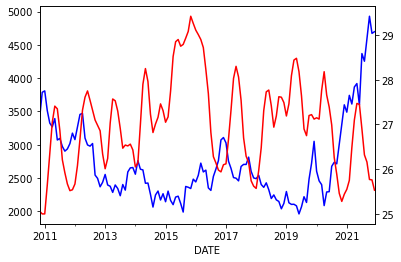

In [18]:
plt.figure()
df.종가.plot(style = 'b-')
df.nino34.plot(secondary_y = True, style = 'r')

## Cross-Correlation

In [19]:
def cross_corr(x, y, lag):
    return x.corr(y.shift(periods=lag))

In [20]:
cc = [cross_corr(df['nino34'], df['종가'], lag=i) for i in range(13)]
cc

[-0.5160620328289677,
 -0.4787420187571255,
 -0.42810203598664215,
 -0.37779219556015226,
 -0.3319495422811955,
 -0.3242463216328173,
 -0.3486498175278745,
 -0.4088786906448838,
 -0.47505933996253524,
 -0.5200528800247579,
 -0.537773756865121,
 -0.5052713174917699,
 -0.4387044949441734]

## Random Forest Regression
### 예측 데이터셋 생성
snippet from: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [32]:
values = df[['종가', 'nino34']].values
data = series_to_supervised(values, n_in = 2)

In [43]:
df['nino-1'] = df['nino34'].shift(periods = 1)
df['nino-2'] = df['nino34'].shift(periods = 2)
df['종가-1'] = df['종가'].shift(periods = 1)
df['종가-2'] = df['종가'].shift(periods = 2)

In [44]:
df

,평균가,등락률(%),종가,환산가($/ton),nino34,nino-1,nino-2,종가-1,종가-2
DATE,,,,,,,,,
2010-11-01,3257.68,0.00,3412.0,NaN,25.06,NaN,NaN,NaN,NaN
2010-12-01,3626.81,0.00,3788.0,NaN,25.00,25.06,NaN,3412.0,NaN
2011-01-01,3741.47,0.00,3809.0,NaN,25.00,25.00,25.06,3788.0,3412.0
2011-02-01,3750.43,0.00,3515.0,NaN,25.64,25.00,25.00,3809.0,3788.0
2011-03-01,3424.65,0.00,3326.0,NaN,26.36,25.64,25.00,3515.0,3809.0
...,...,...,...,...,...,...,...,...,...
2021-08-01,4307.95,59.46,4254.0,1028.16,26.32,26.90,27.45,4369.0,3599.0
2021-09-01,4379.61,53.18,4595.0,1046.57,26.16,26.32,26.90,4254.0,4369.0
2021-10-01,4911.41,68.73,4929.0,1182.21,25.77,26.16,26.32,4595.0,4254.0


In [51]:
data = df.drop(columns = ['nino34', '평균가', '등락률(%)', '환산가($/ton)'])

In [65]:
data.dropna(inplace = True)

In [67]:
data

,종가,nino-1,nino-2,종가-1,종가-2
DATE,,,,,
2011-01-01,3809.0,25.00,25.06,3788.0,3412.0
2011-02-01,3515.0,25.00,25.00,3809.0,3788.0
2011-03-01,3326.0,25.64,25.00,3515.0,3809.0
2011-04-01,3270.0,26.36,25.64,3326.0,3515.0
2011-05-01,3393.0,27.05,26.36,3270.0,3326.0
...,...,...,...,...,...
2021-08-01,4254.0,26.90,27.45,4369.0,3599.0
2021-09-01,4595.0,26.32,26.90,4254.0,4369.0
2021-10-01,4929.0,26.16,26.32,4595.0,4254.0


In [68]:
predict_var = '종가'

y = data[predict_var]
x = data.drop(columns = [predict_var])

### Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [70]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = regressor.predict(x_test)

### 정확도

In [83]:
errors = abs(y_pred - y_test)
print('Mean Absolute Error ', round(np.mean(errors), 2))

Mean Absolute Error  154.65


In [84]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%')

Accuracy:  94.29 %


In [80]:
from sklearn.metrics import r2_score

In [81]:
r2_score(y_test, y_pred)

0.8841640981584522

### 중요성
snippet from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [86]:
feature_list = list(x.columns)
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 종가-1                 Importance: 0.82
Variable: 종가-2                 Importance: 0.14
Variable: nino-1               Importance: 0.02
Variable: nino-2               Importance: 0.02


### 가시화
snippet from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [87]:
predictions_data = pd.DataFrame(y_pred)